# Clustering Analysis

This notebook performs clustering analysis using UMAP for dimensionality reduction and HDBSCAN/K-means for clustering.


In [1]:
import json
import numpy as np
import sys
from pathlib import Path

# Add src to path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root / "src"))

from clustering import perform_clustering_analysis

# Set up paths
data_path = project_root / "data" / "processed" / "cleaned_data.json"
embeddings_path = project_root / "data" / "processed" / "embeddings.npy"
output_dir = project_root / "data" / "processed"

print(f"Loading data from: {data_path}")
print(f"Loading embeddings from: {embeddings_path}")


Loading data from: /Users/kevinmcpherson/github-projects/emergent-ventures-semantic-map/data/processed/cleaned_data.json
Loading embeddings from: /Users/kevinmcpherson/github-projects/emergent-ventures-semantic-map/data/processed/embeddings.npy


In [2]:
# Load data and embeddings
with open(data_path, 'r') as f:
    cleaned_data = json.load(f)

embeddings = np.load(embeddings_path)

print(f"Loaded {len(cleaned_data)} entries")
print(f"Embeddings shape: {embeddings.shape}")


Loaded 18 entries
Embeddings shape: (18, 3072)


Reducing dimensions with UMAP...


/Users/kevinmcpherson/github-projects/emergent-ventures-semantic-map/venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/kevinmcpherson/github-projects/emergent-ventures-semantic-map/venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/kevinmcpherson/github-projects/emergent-ventures-semantic-map/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kevinmcpherson/github-projects/emergent-ventures-semantic-map/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Clustering with HDBSCAN...
Found 0 clusters
Noise points: 18
Saved visualization to: /Users/kevinmcpherson/github-projects/emergent-ventures-semantic-map/data/processed/hdbscan_clusters.png


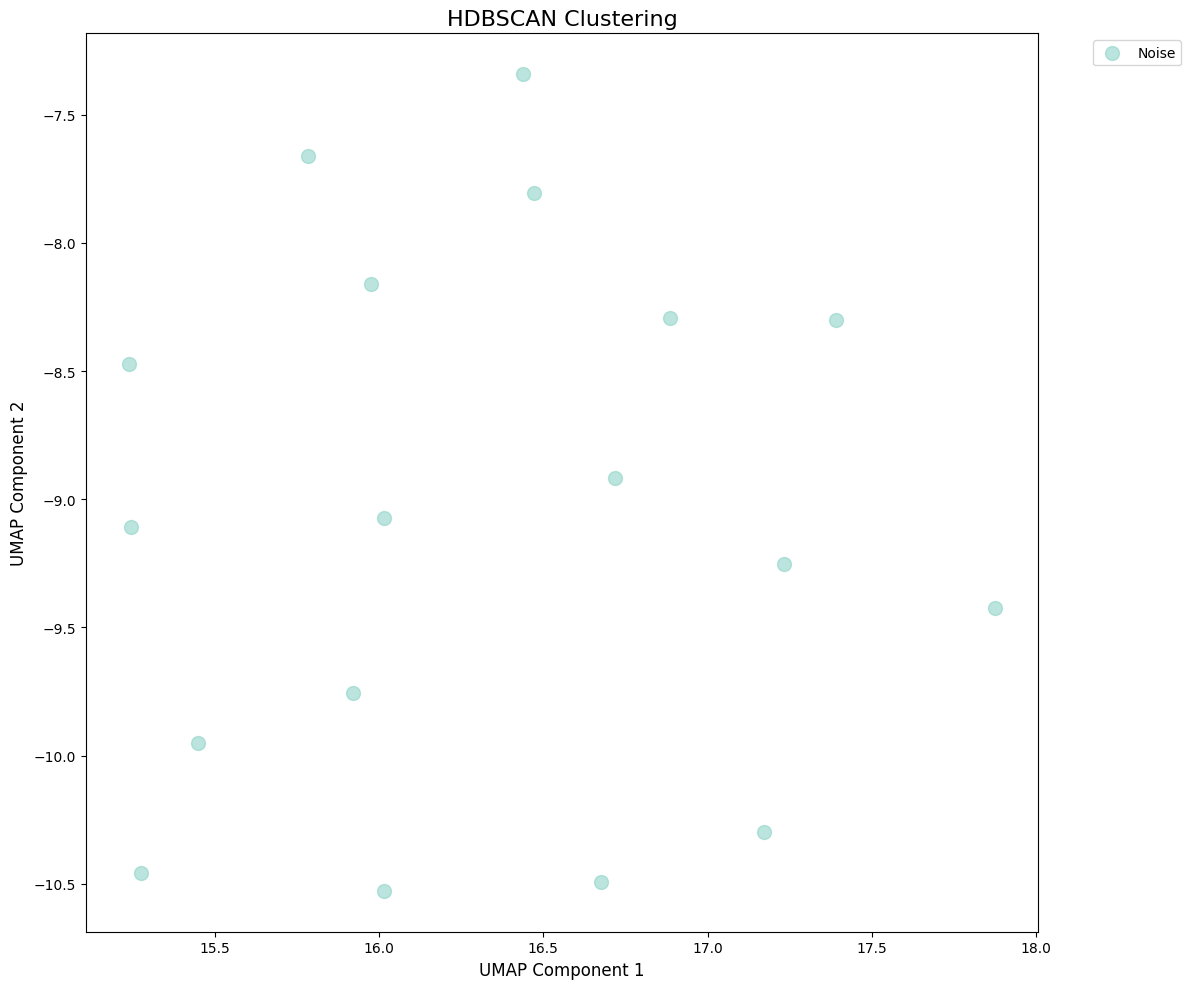


Finding optimal k for K-means...
Optimal k: 7 (silhouette scores: {3: 0.03403520312347008, 4: 0.022179130406102053, 5: 0.03810793131122428, 6: 0.03993949426504722, 7: 0.05054929294746644, 8: 0.042956289761537564})

Clustering with K-means (k=7)...
Found 7 clusters
Saved visualization to: /Users/kevinmcpherson/github-projects/emergent-ventures-semantic-map/data/processed/kmeans_clusters.png


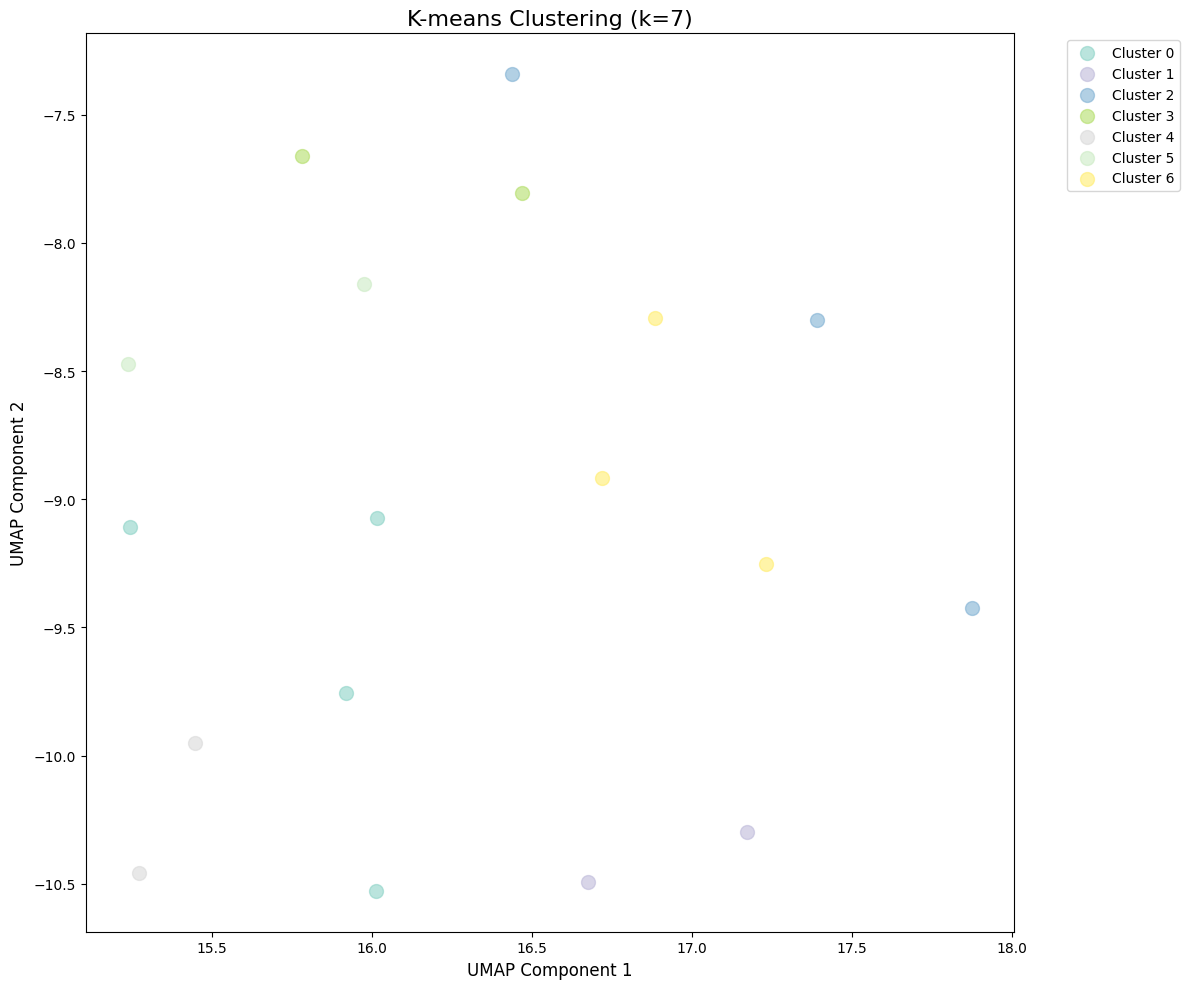

In [3]:
# Perform clustering analysis (both methods)
results = perform_clustering_analysis(
    cleaned_data,
    embeddings,
    method="both",
    output_dir=output_dir
)


In [4]:
# Display HDBSCAN results
if 'hdbscan' in results:
    print("=== HDBSCAN CLUSTERING RESULTS ===")
    hdbscan_analysis = results['hdbscan']['analysis']
    
    print(f"\nNumber of clusters: {hdbscan_analysis['n_clusters']}")
    print(f"Noise points: {hdbscan_analysis['n_noise']}")
    
    print("\nCluster summaries:")
    for summary in hdbscan_analysis['cluster_summaries']:
        print(f"\nCluster {summary['cluster_id']} ({summary['size']} entries):")
        print(f"  Top domains: {list(summary['top_domains'].keys())}")
        print(f"  Top categories: {list(summary['top_categories'].keys())}")
        print(f"  Names: {', '.join(summary['names'][:5])}")
        if len(summary['names']) > 5:
            print(f"  ... and {len(summary['names']) - 5} more")


=== HDBSCAN CLUSTERING RESULTS ===

Number of clusters: 0
Noise points: 18

Cluster summaries:


In [5]:
# Display K-means results
if 'kmeans' in results:
    print("=== K-MEANS CLUSTERING RESULTS ===")
    kmeans_analysis = results['kmeans']['analysis']
    optimal_k = results['kmeans']['optimal_k']
    
    print(f"\nOptimal k: {optimal_k}")
    print(f"Number of clusters: {kmeans_analysis['n_clusters']}")
    
    print("\nCluster summaries:")
    for summary in kmeans_analysis['cluster_summaries']:
        print(f"\nCluster {summary['cluster_id']} ({summary['size']} entries):")
        print(f"  Top domains: {list(summary['top_domains'].keys())}")
        print(f"  Top categories: {list(summary['top_categories'].keys())}")
        print(f"  Names: {', '.join(summary['names'][:5])}")
        if len(summary['names']) > 5:
            print(f"  ... and {len(summary['names']) - 5} more")


=== K-MEANS CLUSTERING RESULTS ===

Optimal k: 7
Number of clusters: 7

Cluster summaries:

Cluster 0 (4 entries):
  Top domains: ['energy', 'hardware', 'robotics', 'agriculture', 'automation']
  Top categories: ['hardware', 'organization']
  Names: Deev Mehta, Prakyath Gowda, Sajal Deolikar, Yash Darji

Cluster 1 (2 entries):
  Top domains: ['career development', 'engineering']
  Top categories: ['career']
  Names: Samarth K J, Krupal Virani

Cluster 2 (3 entries):
  Top domains: ['education', 'healthcare', 'open source', 'platforms', 'hardware']
  Top categories: ['software', 'hardware', 'organization']
  Names: Mihir Maroju, Shwapno Rahman, Sudhir Sarnobat and Rajendra Bagwe

Cluster 3 (2 entries):
  Top domains: ['hardware', 'healthcare', 'safety']
  Top categories: ['hardware']
  Names: Vatsal Hariramani, Rushab M

Cluster 4 (2 entries):
  Top domains: ['physics', 'mathematics', 'complex systems', 'social modeling', 'education']
  Top categories: ['research', 'education']
  Names:

In [6]:
# Add cluster assignments to data and save
import json

# Use K-means results (or HDBSCAN if preferred)
if 'kmeans' in results:
    cluster_labels = results['kmeans']['labels']
    method = 'kmeans'
else:
    cluster_labels = results['hdbscan']['labels']
    method = 'hdbscan'

# Add cluster assignments
for i, entry in enumerate(cleaned_data):
    entry[f'cluster_{method}'] = int(cluster_labels[i])

# Save updated data
output_path = project_root / "data" / "processed" / "cleaned_data.json"
with open(output_path, 'w') as f:
    json.dump(cleaned_data, f, indent=2)

print(f"Saved data with cluster assignments to: {output_path}")


Saved data with cluster assignments to: /Users/kevinmcpherson/github-projects/emergent-ventures-semantic-map/data/processed/cleaned_data.json
